Introducting data augmentation to reducing overfitting
And thus applying
* rotation
* flipping
* zooming
* cropping

In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
train_num = len(os.listdir('pizza_steak/train/pizza'))
test_num = len(os.listdir('pizza_steak/test/pizza'))

train_num, test_num

(750, 250)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_image(image_dir, class_name):
    target_dir = image_dir + class_name

    random_image = random.sample(os.listdir(target_dir),1)
    print (random_image)

    img = mpimg.imread(target_dir + '/' + random_image[0])
    plt.figure(figsize=(6,6))
    plt.axis('off')
    plt.title(class_name)
    plt.imshow(img)

    return img




['2807888.jpg']


array([[[114,  51,  44],
        [111,  48,  41],
        [109,  46,  39],
        ...,
        [245, 226, 222],
        [243, 224, 218],
        [242, 223, 217]],

       [[117,  54,  47],
        [115,  52,  45],
        [111,  48,  41],
        ...,
        [233, 210, 204],
        [227, 204, 198],
        [222, 199, 191]],

       [[119,  59,  51],
        [117,  57,  49],
        [113,  53,  45],
        ...,
        [182, 149, 140],
        [170, 137, 128],
        [160, 128, 117]],

       ...,

       [[232, 241, 250],
        [232, 241, 250],
        [233, 242, 251],
        ...,
        [195, 184, 182],
        [195, 184, 182],
        [195, 184, 182]],

       [[232, 241, 250],
        [232, 241, 250],
        [232, 241, 250],
        ...,
        [195, 184, 182],
        [195, 184, 182],
        [195, 184, 182]],

       [[231, 240, 249],
        [231, 240, 249],
        [231, 240, 249],
        ...,
        [195, 184, 182],
        [195, 184, 182],
        [195, 184, 182]]

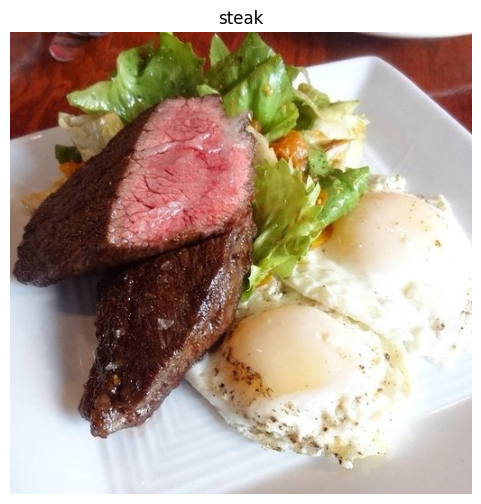

In [4]:
view_image('pizza_steak/train/', 'steak')

Defining the data augmentation parameters

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_aug = ImageDataGenerator(rescale=1./225,
                                    zoom_range=0.2,
                                    rotation_range=0.2,
                                    shear_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    )

train_data_gen = ImageDataGenerator(rescale=1./225)
test_data_gen = ImageDataGenerator(rescale=1./225)

In [6]:
train_path = 'pizza_steak/train'
test_path ='pizza_steak/test'

print('Augmented training data:')
train_img_aug = train_data_aug.flow_from_directory(
                                                   train_path,
                                                   batch_size=32,
                                                   target_size=(224,224),
                                                   class_mode='binary',
                                                   shuffle = False
                                                
)

print('Non Augmented training data:')
train_img = train_data_gen.flow_from_directory(
                                               train_path,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               shuffle = False

)

print('Non Augmented test data:')
test_img = test_data_gen.flow_from_directory(
                                             test_path,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode= 'binary'
)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non Augmented training data:
Found 1500 images belonging to 2 classes.
Non Augmented test data:
Found 500 images belonging to 2 classes.


In [7]:
train_images, labels = next(train_img)
aug_train_images, aug_labels = next(train_img_aug)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


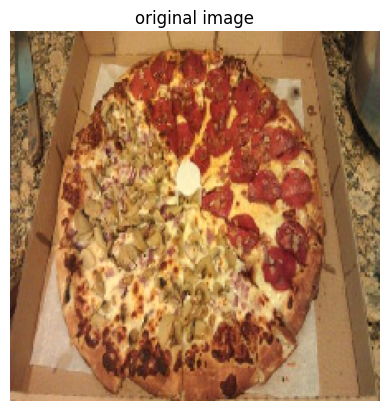

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


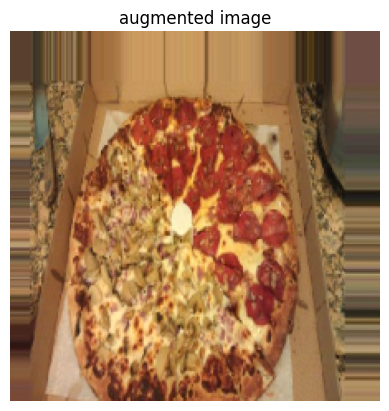

In [8]:
random_num = random.randint(0,32)

random_img = train_images[random_num]
random_aug_img = aug_train_images[random_num]

print(random_num)
plt.imshow(random_img)
plt.title('original image')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(random_aug_img)
plt.title('augmented image')
plt.axis('off')
plt.show()

In [9]:
# defining the model parameters
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(10, 3, input_shape=(224,224,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))

model.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))

model.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compiling the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
# fit the model
history = model.fit(
    train_img_aug,
    epochs = 10,
    validation_data = test_img
)

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.4811 - loss: 0.8240 - val_accuracy: 0.5880 - val_loss: 0.6863
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.6016 - loss: 0.6938 - val_accuracy: 0.5440 - val_loss: 0.6698
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 159s 3s/step - accuracy: 0.5489 - loss: 0.6834 - val_accuracy: 0.5520 - val_loss: 0.6525
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.6107 - loss: 0.6664 - val_accuracy: 0.7700 - val_loss: 0.6591
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6499 - loss: 0.6582 - val_accuracy: 0.6660 - val_loss: 0.6007
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 806ms/step - accuracy: 0.6278 - loss: 0.6571 - val_accuracy: 0.7700 - val_loss: 0.5477
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7304 - loss: 0.5891 - val_accuracy: 0.8200 - val_loss: 0.4761
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7270 - loss: 0.5668 - val_accuracy: 0.8060 - val_loss: 0.46

In [10]:
def loss_function(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epoch = range(10)

    plt.figure()
    plt.plot(epoch, val_loss, label='loss')
    plt.plot(epoch, loss, label='val-loss')
    plt.title('loss-curve')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epoch, val_accuracy, label='accuracy')
    plt.plot(epoch, accuracy, label='accuracy')
    plt.title('Accuracy')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

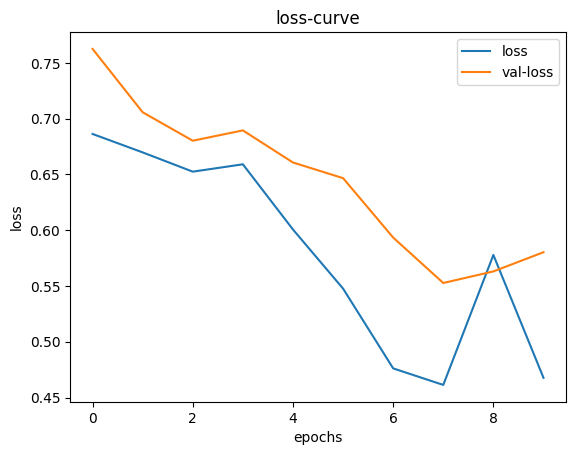

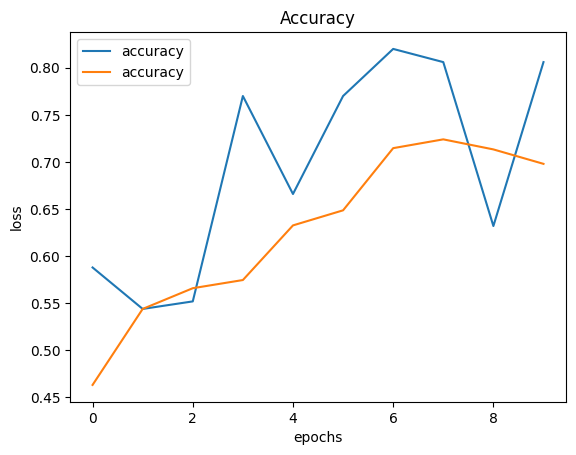

In [11]:
loss_function(history)

Now let's see if we turn shuffle on, the accuarcy of the the model improve??

In [12]:
shuffled_train_data_aug = train_data_aug.flow_from_directory(train_path,
                                         target_size=(224,224),
                                         class_mode='binary',
                                         batch_size=32,
                                         shuffle=True)

Found 1500 images belonging to 2 classes.


In [13]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3), activation='relu'))
model2.add(tf.keras.layers.Conv2D(10,3, activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(2))
model2.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model2.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(2))
model2.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model2.add(tf.keras.layers.Conv2D(10,3,activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(2))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history2 = model2.fit(shuffled_train_data_aug,
                    epochs=10,
                    validation_data = test_img)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 868ms/step - accuracy: 0.5249 - loss: 0.6891 - val_accuracy: 0.7520 - val_loss: 0.5609
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7017 - loss: 0.5634 - val_accuracy: 0.8360 - val_loss: 0.3995
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7508 - loss: 0.5024 - val_accuracy: 0.8600 - val_loss: 0.3336
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 899ms/step - accuracy: 0.7895 - loss: 0.4807 - val_accuracy: 0.8440 - val_loss: 0.3713
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 797ms/step - accuracy: 0.7910 - loss: 0.4459 - val_accuracy: 0.8820 - val_loss: 0.3233
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 837ms/step - accuracy: 0.8071 - loss: 0.4243 - val_accuracy: 0.8620 - val_loss: 0.3413
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 832ms/step - accuracy: 0.8020 - loss: 0.4482 - val_accuracy: 0.8940 - val_loss: 0.2947
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 43s 828ms/step - accuracy: 0.8297 - loss: 0.4061 - val_accuracy: 

Notes: Shuffling your data can improve your performance of the model.

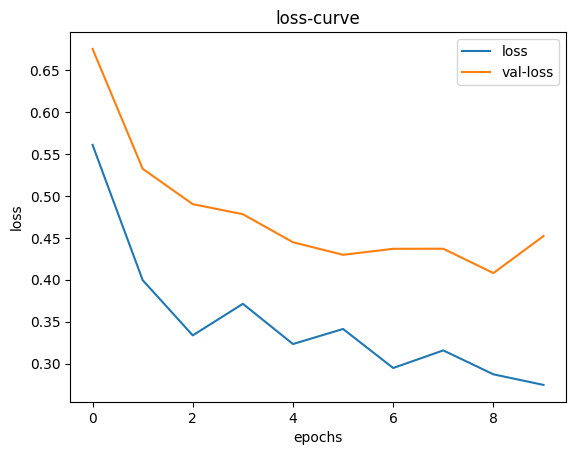

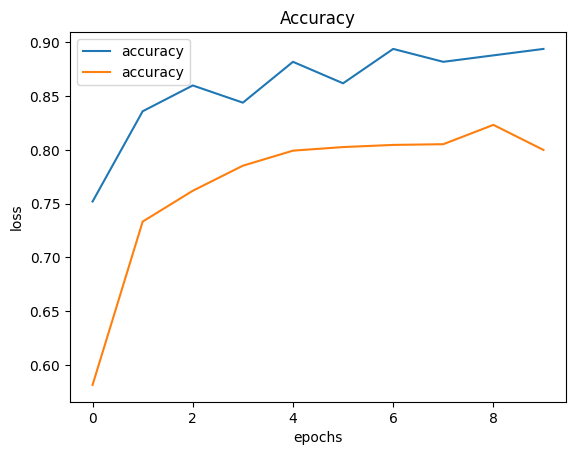

In [14]:
loss_function(history2)

In [15]:
import pathlib
import glob

dir_names = pathlib.Path('pizza_steak/train')
class_namess = np.array(sorted(item.name for item in dir_names.glob('*')))
print(class_namess)

['pizza' 'steak']


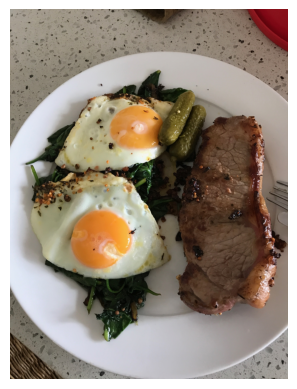

In [16]:
import matplotlib.image as mpimg


steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis('off')
plt.show()


In [17]:
steak.shape

(4032, 3024, 3)

In [18]:
image_size = 224

def load_image(filename, image_size):
    # load the image
    image = tf.io.read_file(filename)
    # convert image to tensors
    image = tf.image.decode_image(image)
    # resize image
    image = tf.image.resize(image, size=[image_size, image_size])
    # rescale image
    image = image/225.0
    return image


In [19]:
steak = load_image('03-steak.jpeg', image_size)

In [20]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [21]:
model2.predict(tf.expand_dims(steak, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


array([[0.8750505]], dtype=float32)

In [22]:
def pred_and_view(model, filename, class_name=class_namess):

    img = load_image(filename, image_size=image_size)

    pred = model.predict(tf.expand_dims(img, axis=0))

    prediction = int(tf.round(pred))

    pred_class = class_name[prediction]

    plt.imshow(img)
    plt.title(f'Predicted class: {pred_class}')
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


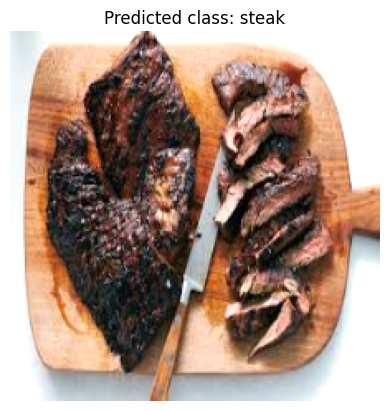

In [23]:
pred_and_view(model2, 'images (2).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


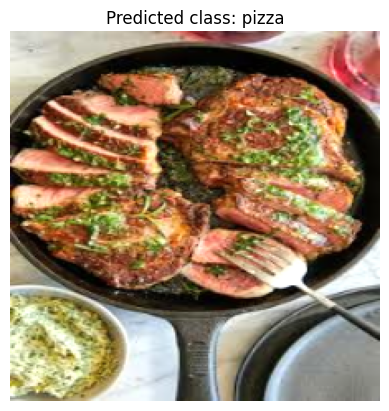

In [24]:
pred_and_view(model2, 'images (1).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


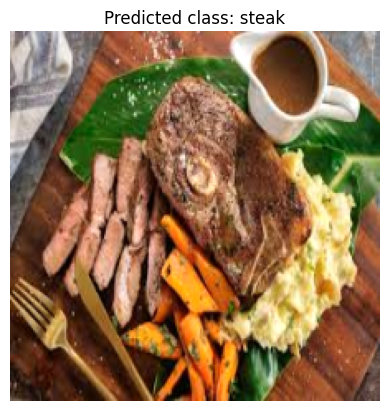

In [25]:
pred_and_view(model2, 'images.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


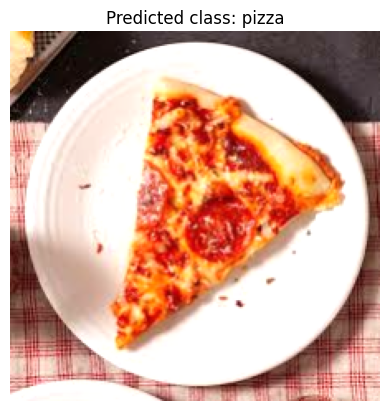

In [26]:
pred_and_view(model2, 'download.jpg')